<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.datasets import load_boston

%matplotlib inline

# Домашнее задание 3. Математика для data sciense. Нетология.

Решить систему линейных уравнений:

![alt text](https://italiandirectory.eu/wp-content/ql-cache/quicklatex.com-34a5602e13176cbddcfd35cca34478fe_l3.svg)

In [2]:
a = np.array([[2,1,1], [1,3,2], [1, 0, 0]])
b = np.array([4,5,6])
x = np.linalg.solve(a, b)
x

array([  6.,  15., -23.])

Проверяем

In [3]:
np.allclose(np.dot(a, x), b)

True

Анна выбирает тарифный план для телефонной связи. Первый план, T1, стоит 20 долларов в месяц, каждый звонок стоит 25 центов в минуту. Второй тарифный план, T2, стоит 40долларов в месяц, но звонки стоят 8 центов в минуту. Какой план ей выбрать, если Анна звонит не более 117 минут в месяц?

Составим задачу в системе линейных уравнений. 

Количество минут - независимая переменная, будет нашим x. Стоимость тарифа - зависимая величина, будет нашим y. 

Написать систему уравнений для данной задачи, построить график, найти точку пересечения прямых. 
Сделать вывод о том, какой тариф использовать лучше для Анны.

Система уравнений будет выглядеть так:
$$\left\{\begin{matrix}
y = \frac{25}{100}x + 20\\ 
y = \frac{8}{100}x + 40
\end{matrix}\right.$$
приведём в другой вид
$$\left\{\begin{matrix}
\frac{25}{100}x - y = -20\\ 
\frac{8}{100}x -y = -40
\end{matrix}\right.$$
и решим данную систему уравнений

In [4]:
a = np.array([[.25, -1], [0.08, -1]])
b = np.array([-20,-40])
decision = np.linalg.solve(a, b)
decision

array([117.64705882,  49.41176471])

Расчитаем стоимость тарифа для максимального количества минут (117мин)

In [5]:
.25*117+20,.08*117+40

(49.25, 49.36)

Видим что по первому тарифному плану выгодней говорить, но если бы Анна говорила хотя бы на минуту больше то выгодней было бы использовать второй план, убидимся в этом на графике

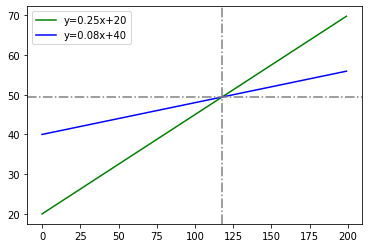

In [6]:
x = np.arange(0, 200)
y1 = .25 * x + 20
y2 = 0.08 * x + 40

plt.figure()
plt.plot(x, y1, color='green')
plt.plot(x, y2, color='blue')

# draw cross of intersection point
plt.axvline(x=decision[0], color='grey', linestyle='-.')
plt.axhline(y=decision[1], color='grey', linestyle='-.')
plt.legend(['y=0.25x+20','y=0.08x+40'])
plt.show()
plt.close()

Загрузить датасет Boston houses. 
Выбрать 3-хмерное пространство (3 атрибута из таблицы), взять 3 дома по данному трехмерному пространству, доказать, что данные векторы не компланарны.

In [7]:
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [8]:
pdboston = pd.DataFrame(boston.data, columns=boston.feature_names)
boston3dim = pdboston[["INDUS", "NOX", "RM"]]
b0, b1, b2 = np.array(boston3dim.iloc[0]), np.array(boston3dim.iloc[1]), np.array(boston3dim.iloc[2])
b0, b1, b2

(array([2.31 , 0.538, 6.575]),
 array([7.07 , 0.469, 6.421]),
 array([7.07 , 0.469, 7.185]))

In [9]:
c = np.vstack((b0, b1, b2)).transpose()
c

array([[2.31 , 7.07 , 7.07 ],
       [0.538, 0.469, 0.469],
       [6.575, 6.421, 7.185]])

In [10]:
np.linalg.det(c)

-2.078286279999999

Определитель не равен нулю, значит вектора b0, b1 и b2 не компланарны

Для матрицы, полученной на предыдущей задачи, посчитать собственный вектор(v). Умножить собственный вектор на матрицу (Av). Сделать график. Во сколько раз Av отличается от v?

In [11]:
e_vals, e_vecs = np.linalg.eig(c)
e_vecs = e_vecs.T # !собственные вектора записаны в столбцах поэтому транспонируем
print('Исходная матрица: \n', c)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[2.31  7.07  7.07 ]
 [0.538 0.469 0.469]
 [6.575 6.421 7.185]]
Собственные вектора: 
 [[ 0.59484578  0.05773275  0.80176395]
 [ 0.84879303 -0.06812062 -0.52431858]
 [-0.11130039 -0.68480567  0.72017596]]
Собственные значения:  [12.5254908 -2.6247072  0.0632164]


In [12]:
Av = [c.dot(v) for v in e_vecs]
Av

[array([ 7.45073537,  0.72313098, 10.04248693]),
 array([-2.22783318,  0.17879667,  1.37618274]),
 array([-0.00703601, -0.04329095,  0.04552693])]

Сравним с тем что дает умножение собственного вектора на собственное значение

In [13]:
Av_test = [e_vec * e_val for e_vec, e_val in zip(e_vecs, e_vals)]
Av_test

[array([ 7.45073537,  0.72313098, 10.04248693]),
 array([-2.22783318,  0.17879667,  1.37618274]),
 array([-0.00703601, -0.04329095,  0.04552693])]

Видим что значения Av и Av_test совпадают, значит выполняетя тождество ${A\vec\upsilon}=\lambda{\vec\upsilon}$. Av и v отличаются на собственные значения $\lambda$.

Графическое представление посчитанных значений

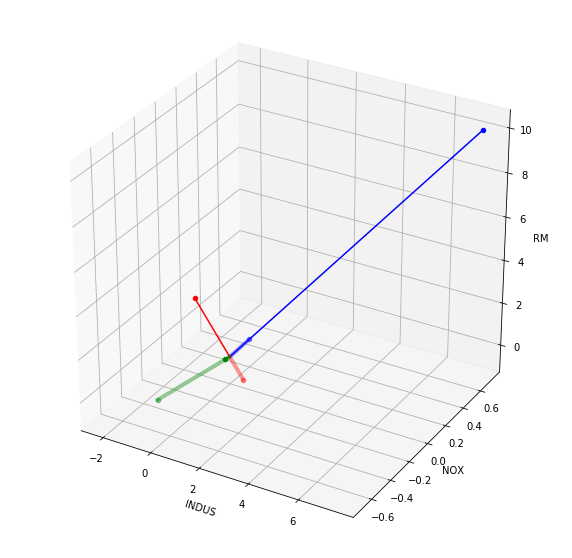

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
colors = ['b','r','g']

for idx, clr in enumerate(['b','r','g']) :
    # draw v value
    ax.plot([0, e_vecs[idx][0]], [0, e_vecs[idx][1]], [0, e_vecs[idx][2]], c=clr, linewidth = 4, alpha=0.4)
    # with marker
    ax.scatter(e_vecs[idx][0], e_vecs[idx][1], e_vecs[idx][2], c=clr, marker='o', alpha=0.4)
    
    # draw Av value
    ax.plot([0, Av[idx][0]], [0, Av[idx][1]], [0, Av[idx][2]], c=clr)
     # with marker
    ax.scatter(Av[idx][0], Av[idx][1], Av[idx][2], c=clr, marker='o')

ax.set_xlabel('INDUS')
ax.set_ylabel('NOX')
ax.set_zlabel('RM')

plt.show()

Задание повышенного уровня.

Как посчитать интеграл полинома, полученного в домашнем задании №2, при полиномиальной регрессии?

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
price = boston_dataset.target
  
x = boston.LSTAT

x = np.array(x).reshape(-1, 1)
y = price

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(x) 

lin2 = LinearRegression()
model = lin2.fit(X_poly, y)

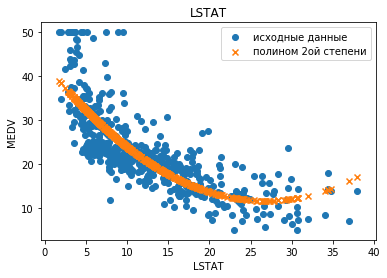

In [16]:
y_pred = model.predict(X_poly)
plt.scatter(x, y, marker='o')
plt.scatter(x, y_pred, marker='x')
plt.title('LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(['исходные данные', 'полином 2ой степени'])
plt.show()

Для подсчета интеграла полинома достаточно получить пределы интегрирования, а формулу можно эмулировать настроенной моделью либо же вытащить коэффициенты и вручную составить формулу

переделы интегрирования (на самом деле могут быть разными, но т.к. по условию не даны пределы то выбираем разброс LSTAT данных)

In [17]:
a, b = min(x)[0], max(x)[0]
a,b

(1.73, 37.97)

формула через модель

In [18]:
def fx_v1(x):
    # получение доп фич для линейной регрессии (x^0, x^1 и x^2)
    x_ = poly.transform(np.array(x).reshape(-1, 1))
    # предсказание
    return model.predict(x_)[0]
fx_v1(0), fx_v1(27) # пробные значения

(42.86200732816938, 11.621520016679519)

формула через коэффициенты

In [19]:
from functools import reduce
def fx_v2(x):
    return reduce((lambda x, y : x + y), [coef * x ** idx for idx, coef in enumerate(model.coef_)], model.intercept_)
fx_v2(0), fx_v2(27) # пробные значения

(42.86200732816938, 11.621520016679519)

расчет интеграла

In [20]:
import scipy.integrate as spint

print("Интеграл с f1 = {}".format(spint.quad(fx_v1, a, b)))
print("Интеграл с f2 = {}".format(spint.quad(fx_v2, a, b)))

Интеграл с f1 = (669.7131464908402, 7.435309551282913e-12)
Интеграл с f2 = (669.7131464908402, 7.435309551282913e-12)
